# South African Language Identification Hack 2023

This notebook will import all the libraries, data and different models to attempt this exercise modelling  

In [314]:
#import all the libraries that will be used throughout the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

#models to be test
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
#importing the neural net modules
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

#model evaluation
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [315]:
#import the test and training tests
train_df = pd.read_csv('/content/train_set.csv')
test_df = pd.read_csv('/content/test_set.csv')

In [316]:
# first glance at training set
train_df.head(5)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [317]:
# looking the shape of the provided data
train_df.shape

(33000, 2)

In [318]:
# The code below will explore the different targets values
print(train_df.lang_id.unique())
print("There are : " , train_df['lang_id'].nunique(), "Different langauges")

['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']
There are :  11 Different langauges


From Aboce we can observe that there are 11 different languages, this is conisident with the Sounth African demography

## Explorig the target variable

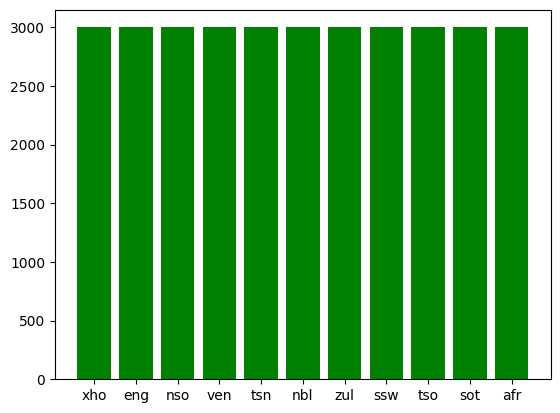

In [319]:
labels_counts = train_df['lang_id'].value_counts()
fre = [x for x in labels_counts]
labels = train_df.lang_id.unique()

data_plot = {}

for lang,count in zip(labels,labels_counts):
    data_plot[lang] = count

plt.bar(labels, labels_counts, color='green', linestyle='-')
plt.show()

From above, we can observe that the data is balanced. Thus potentially will generate balanced results

# Text Preprocessing

In [320]:
#revome punctuation
train_df["text"] = train_df['text'].str.replace('[^\w\s]','')
test_df["text"] = test_df['text'].str.replace('[^\w\s]','')

#convert all words to lower
test_df["text"] = test_df['text'].str.lower()
test_df["text"] = test_df['text'].str.lower()

<ipython-input-320-73a18150ff46>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["text"] = train_df['text'].str.replace('[^\w\s]','')
<ipython-input-320-73a18150ff46>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df["text"] = test_df['text'].str.replace('[^\w\s]','')


In [321]:
train_df.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


# Tokenize / Vectorising


In [322]:
#vactorize data

print('Splitting imput data')
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], train_df['lang_id'], test_size=0.20)

print('Vectoriser')
#train and test vectoriser
vectoriser = HashingVectorizer()
vectorizer = HashingVectorizer(ngram_range = (1,1))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

"""#padding all sequences to ensure consitent length
max_sequence_length = max(len(seq) for seq in X_train + X_test)
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)"""


Splitting imput data
Vectoriser


'#padding all sequences to ensure consitent length\nmax_sequence_length = max(len(seq) for seq in X_train + X_test)\nX_train = pad_sequences(X_train, maxlen=max_sequence_length)\nX_test = pad_sequences(X_test, maxlen=max_sequence_length)'

# Modeling

In [ ]:
"""print('Fitting lR')
# Support vector classifier
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(train_matrix, train_data['lang_id'])

y_pred = clf.predict(test_matrix)
f1 = f1_score(test_data['lang_id'], y_pred, average='micro')
print(f1)"""

In [9]:
#generate predictions for kaggle
kaggle_test_matrix = vectorizer.transform(test_df['text'].values.astype('U'))
predictions = clf.predict(kaggle_test_matrix)

In [10]:
#write to csv
test_df.head()
output_df = test_df[['index']]
output_df['lang_id'] = predictions

output_df.to_csv(f'kaggle_submission.csv', index=False)



In [ ]:
#data split
#X_train, X_test, y_train, y_test = train_test_split(vc_features,vc_labels, test_size=0.30,random_state=42)

## Modellig function

In [ ]:
def train_models_and_evaluate(df):
    # Train-test split
    print('Splitting imput data')
    train_data,test_data = train_test_split(df,test_size = 0.20)


    print('HashingVectorizer')
    #train and test vectoriser
    vectorizer = HashingVectorizer(ngram_range = (1,1))
    train_matrix = vectorizer.fit_transform(train_data['text'].values.astype('U'))
    test_matrix = vectorizer.transform(test_data['text'].values.astype('U'))


    # Modelling
    # 20 trees in forest
    print('Fitting RF')
    rf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
    rf.fit(train_matrix, train_data['lang_id'])

    print('Fitting SV')
    # Support vector classifier
    clf = svm.SVC(decision_function_shape='ovo')
    clf.fit(train_matrix, train_data['lang_id'])

    print('Fitting KNN')
    # Fit KNN with 4 classes.
    kn = KNeighborsClassifier(n_neighbors=4)
    kn.fit(train_matrix, train_data['lang_id'])

    print('Fitting SGD')
    # SGD Classifier
    sgd = SGDClassifier(random_state=42)
    sgd.fit(train_matrix, train_data['lang_id'])

    print('Fitting LR')
    # Logistic Regression
    lr = LogisticRegression(multi_class='ovr', max_iter=500, random_state=42)
    lr.fit(train_matrix, train_data['lang_id'])

    print('Fitting GBC')
    # Gradient Boosting Classifier
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
    #gbc.fit(train_matrix, train_data['lang_id'])

    print('Fitting ADA')
    # AdaBoost Classifier
    abc = AdaBoostClassifier(n_estimators=50, random_state=42)
    #abc.fit(train_matrix, train_data['lang_id'])


    # Evaluate models
    models = {
        'Random Forest': rf,
        'SVM': clf,
        'KNN': kn,
        'SGD Classifier': sgd,
        'Logistic Regression': lr
        #'Gradient Boosting Classifier': gbc,
        #'AdaBoost Classifier': abc,
    }
    f1_scores = {}

    for model_name, model in models.items():
        y_pred = model.predict(test_matrix)
        f1 = f1_score(test_data['lang_id'], y_pred, average='micro')
        f1_scores[model_name] = round(f1, 5)
        print(f"{model_name} F1-Score: {f1_scores[model_name]}")


    return models, vectorizer

In [ ]:
#model our train df
modelling_output, vc = train_models_and_evaluate(train_df)

Splitting imput data
HashingVectorizer
Fitting RF
Fitting SV


In [ ]:
#vectorize the test set
test_vect = vc.transform(test_df)


In [ ]:
#make predictions for with models
for model in modelling_output:
    mdl = modelling_output[model]
    predictions = mdl.predict(test_vect)
    print(predictions)

['xho' 'xho']
['ssw' 'ssw']
['eng' 'eng']
['ssw' 'ssw']
['ssw' 'ssw']


# Fitting a Neural Network Model

In [323]:
# we still use our bag-of words from the count vectoriser above
le = LabelEncoder()

Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [324]:
mapping = le.inverse_transform(list(set(Y_train)))
mapping

array(['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven',
       'xho', 'zul'], dtype=object)

In [328]:
#setting up the model

model = Sequential([
    Dense(64, activation='relu', input_shape=(1048576,)),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

In [329]:
#setting up modelling parameters
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [330]:
# Training the model
history = model.fit(X_train,Y_train, batch_size=1000, epochs=5, verbose=True)


Epoch 1/5
27/27 [==============================] - 43s 2s/step - loss: 2.2404 - accuracy: 0.6708
Epoch 2/5
27/27 [==============================] - 39s 1s/step - loss: 1.5209 - accuracy: 0.8795
Epoch 3/5
27/27 [==============================] - 40s 1s/step - loss: 0.6009 - accuracy: 0.9982
Epoch 4/5
27/27 [==============================] - 40s 1s/step - loss: 0.1590 - accuracy: 0.9998
Epoch 5/5
27/27 [==============================] - 40s 1s/step - loss: 0.0521 - accuracy: 1.0000


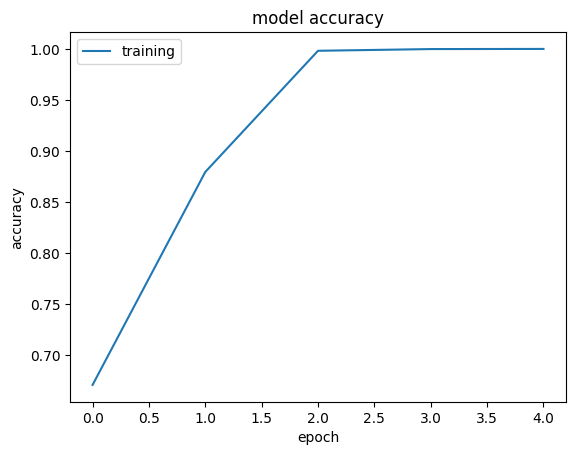

Test loss: 0.0707
Test accuracy: 0.999


In [331]:
# Evaluating the model
loss, accuracy  = model.evaluate(X_test,Y_test, verbose=False)

plt.plot(history.history['accuracy'])
#plt.plot(history.history['eval_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [332]:
test_matrix = vectorizer.transform(test_df['text'].values.astype('U'))
predict = model.predict(test_matrix)

178/178 [==============================] - 1s 2ms/step


In [333]:
#mapping predictions to
predict_value = []
for prediction in predict:
  predict_value.append(mapping[np.argmax(prediction, axis=0)])

In [335]:
output_df = test_df[['index']]
output_df['lang_id'] = predict_value

output_df.to_csv(f'NN_kaggle_submission11.csv', index=False)

## Model Performance

In [337]:
from sklearn.metrics import confusion_matrix

#make predictions on the testing set
predict = model.predict(X_test)
predict_value = []
for prediction in predict:
  predict_value.append(mapping[np.argmax(prediction, axis=0)])


207/207 [==============================] - 0s 2ms/step


In [342]:
# Confusion Metrics
pd.DataFrame(confusion_matrix(predict_value,le.inverse_transform(Y_test)), index=mapping, columns=mapping)

,afr,eng,nbl,nso,sot,ssw,tsn,tso,ven,xho,zul
afr,601,0,0,0,0,0,0,0,0,0,0
eng,0,617,0,0,0,0,0,0,0,0,0
nbl,0,0,589,0,0,0,0,0,0,1,0
nso,0,0,0,627,0,0,0,0,0,0,0
sot,0,0,0,0,583,0,0,0,0,0,0
ssw,0,0,1,0,0,628,0,0,0,0,1
tsn,0,0,0,1,0,0,590,0,0,0,0
tso,0,0,0,0,0,0,0,586,0,0,0
ven,0,0,0,0,0,0,0,0,582,0,0
xho,0,0,0,0,0,0,0,0,0,591,1


### Overall Classification Report


In [343]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(le.inverse_transform(Y_test), predict_value, target_names=mapping))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       601
         eng       1.00      1.00      1.00       617
         nbl       1.00      1.00      1.00       590
         nso       1.00      1.00      1.00       628
         sot       1.00      1.00      1.00       583
         ssw       1.00      1.00      1.00       628
         tsn       1.00      1.00      1.00       590
         tso       1.00      1.00      1.00       586
         ven       1.00      1.00      1.00       582
         xho       1.00      1.00      1.00       592
         zul       1.00      1.00      1.00       603

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

